<a href="https://colab.research.google.com/github/RiShiKaRoRa22/AI_LAB/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd

data = {
    'Age': [25, 40, 35, 50, 23],
    'Income': ['High', 'Low', 'Medium', 'High', 'Low'],
    'Married': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'Credit_Approved': ['Yes', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)



In [2]:
print(df.head())
print(df.info())

   Age  Income Married Credit_Approved
0   25    High     Yes             Yes
1   40     Low      No              No
2   35  Medium     Yes             Yes
3   50    High     Yes             Yes
4   23     Low      No              No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              5 non-null      int64 
 1   Income           5 non-null      object
 2   Married          5 non-null      object
 3   Credit_Approved  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes
None


In [3]:
df['Income']=df['Income'].map({'High':3,'Medium':2,'Low':1})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Credit_Approved']=df['Credit_Approved'].map({'Yes':1,'No':0})


In [4]:
from sklearn.model_selection import train_test_split

X=df.drop('Credit_Approved',axis=1)
y=df['Credit_Approved']

X_train,X_test, Y_train,  Y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

from sklearn.neural_network import MLPClassifier

X_train= scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


MLP=MLPClassifier(hidden_layer_sizes=(8,4),max_iter=300, random_state=42, learning_rate_init=0.02, solver='adam')




In [ ]:
#train model

MLP.fit(X_train,Y_train)

Y_pred=MLP.predict(X_test)

print("predictions are: ", Y_pred)

predictions are:  [1 1]


confusion matrix:


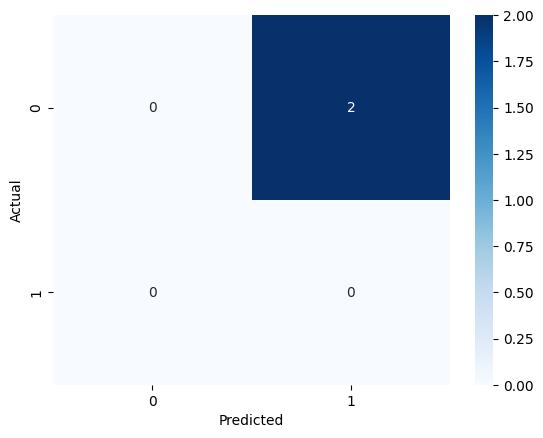

classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

accuracy score 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
#kpis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(Y_test,Y_pred)

print("confusion matrix:" )
sns.heatmap(cm,annot=True,fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("classification report" ,classification_report(Y_test,Y_pred))
print("accuracy score", accuracy_score(Y_test,Y_pred))

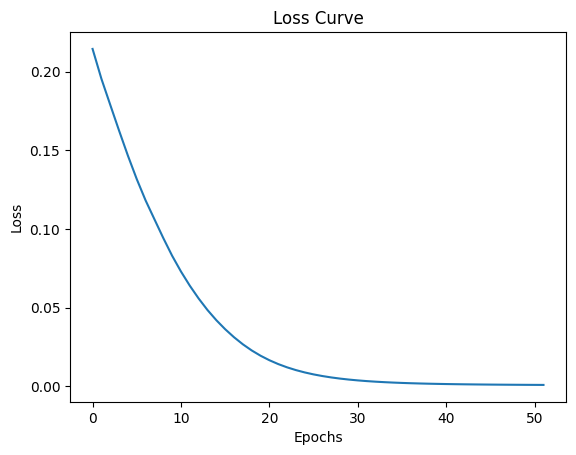

In [ ]:
plt.plot(MLP.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [ ]:
for lr in [0.001,0.01,0.1]:
  model=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=300, random_state=42, learning_rate_init=lr, solver='adam')
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print("learning rate: ", lr)
  print("accuracy score", accuracy_score(Y_test,Y_pred))

learning rate:  0.001
accuracy score 0.0
learning rate:  0.01
accuracy score 0.0
learning rate:  0.1
accuracy score 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#overfit vs underfit analysis


underfit = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=20)
underfit.fit(X_train, Y_train)


overfit = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=1000)
overfit.fit(X_train, Y_train)

print("Underfit Accuracy:", accuracy_score(Y_test, underfit.predict(X_test)))
print("Overfit Accuracy:", accuracy_score(Y_test, overfit.predict(X_test)))


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Underfit Accuracy: 0.0
Overfit Accuracy: 0.0


In [ ]:
#feature importance analysis
for col in X.columns:
    X_temp = X.drop(col, axis=1)
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
        X_temp, y, test_size=0.2, random_state=42)

    X_train_t = scaler.fit_transform(X_train_t)
    X_test_t = scaler.transform(X_test_t)

    model = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=300)
    model.fit(X_train_t, y_train_t)

    acc = accuracy_score(y_test_t, model.predict(X_test_t))
    print(f"Removing {col} → Accuracy: {acc}")


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Removing Age → Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Removing Income → Accuracy: 0.0
Removing Married → Accuracy: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
age = int(input("Enter age: "))

income = input("Enter income (High/Medium/Low): ")

married = input("Enter married status (Yes/No): ")
if income.lower() == "high":
    income_encoded = 2
elif income.lower() == "medium":
    income_encoded = 1
elif income.lower() == "low":
    income_encoded = 0
else:
    print("Invalid income input")

if married.lower() == "yes":
    married_encoded = 1
elif married.lower() == "no":
    married_encoded = 0
else:
    print("Invalid married input")

new_customer = [[age, income_encoded, married_encoded]]


new_customer = scaler.transform(new_customer)

prediction = MLP.predict(new_customer)

if prediction[0] == 1:
    print("Credit Approved")
else:
    print("Credit Rejected")


Enter age: 20
Enter income (High/Medium/Low): medium
Enter married status (Yes/No): no


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but StandardScaler is expecting 2 features as input.